In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
cities = pandas.read_csv('US_cities.csv')
cities.sample(5)

,id,Country,City,AccentCity,Region,Population,Latitude,Longitude
414,2921052,us,moraga,Moraga,CA,16826.0,37.835000,-122.128611
3402,3015932,us,yabucoa,Yabucoa,PR,6952.0,18.052500,-65.879722
2533,2984273,us,irvington,Irvington,NJ,61323.0,40.732222,-74.235278
4024,3042668,us,renton,Renton,WA,56141.0,47.483056,-122.215833
3811,3031957,us,highland,Highland,UT,10066.0,40.450000,-111.769444


In [3]:
import geopandas
cafes = geopandas.read_file('cafes_us_OSM.geojson')
cafes.sample()

,id,@id,amenity,building,cuisine,name,operator,wheelchair,website,addr:city,...,karaoke,gambling,reservation,tourism:disused,indoor:level,landuse,diet:raw,name:it,amenity:ice_cream,geometry
5263,node/1751182525,node/1751182525,cafe,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.59968910000001 45.5247274)


In [4]:
cafes.sample().T.dropna()

,12172
id,node/3348263593
@id,node/3348263593
amenity,cafe
name,Starbucks
addr:city,Clemson
addr:street,"5th Floor, Cooper Library"
addr:postcode,29631
addr:state,SC
geometry,POINT (-82.83647499999999 34.6767953)


In [5]:
cafes['count'] = 1
cafes[['cuisine', 'count']].groupby('cuisine').sum().sort_values('count', ascending=False)[:10]

,count
cuisine,
coffee_shop,6166
donut,625
ice_cream,290
sandwich,284
american,220
coffee,78
cafe,73
regional,71
bagel,64


In [6]:
sorted(list(cafes.columns))

['@id',
 'Door',
 'FIXME',
 'Notes',
 'access',
 'addr',
 'addr.source:street',
 'addr:city',
 'addr:country',
 'addr:county',
 'addr:direction',
 'addr:door',
 'addr:flats',
 'addr:floor',
 'addr:full',
 'addr:house',
 'addr:housename',
 'addr:housenumber',
 'addr:interpolation',
 'addr:place',
 'addr:postcode',
 'addr:province',
 'addr:state',
 'addr:street',
 'addr:street:name',
 'addr:street:prefix',
 'addr:street:type',
 'addr:street_direction_prefix',
 'addr:suburb',
 'addr:suite',
 'addr:unit',
 'addr:unit_1',
 'address',
 'aka',
 'alcohol',
 'alt_name',
 'alt_name2',
 'alt_name_1',
 'alt_name_2',
 'amenity',
 'amenity:bar',
 'amenity:historic',
 'amenity:ice_cream',
 'amenity_1',
 'amenity_2',
 'approximate',
 'atm',
 'atm:operator',
 'attribution',
 'automatic_door',
 'bakery',
 'bar',
 'beer',
 'bicycle_parking',
 'black_owned',
 'branch',
 'brand',
 'brand:wikidata',
 'brewery',
 'building',
 'building:levels',
 'building:part',
 'bus',
 'cafe',
 'camera:mount',
 'capacity',

In [7]:
cafes.isnull().sum() / len(cafes)

id                          0.000000
@id                         0.000000
amenity                     0.000000
building                    0.998607
cuisine                     0.552107
name                        0.030798
operator                    0.970932
wheelchair                  0.950800
website                     0.814443
addr:city                   0.763946
addr:country                0.961514
addr:housenumber            0.665257
addr:province               0.971412
addr:street                 0.657954
internet_access             0.852784
opening_hours               0.866766
payment:amex                0.985154
payment:coins               0.984817
payment:notes               0.984817
recycling:coffee_cups       0.999856
created_by                  0.995628
addr:postcode               0.764186
description                 0.992024
hst_number                  0.999760
self_checkout               0.999952
capacity                    0.998847
smoking                     0.948734
w

In [8]:
cafes = cafes.T[cafes.isnull().sum() / len(cafes) < 0.6].T
cafes.sample(5)

,id,@id,amenity,cuisine,name,geometry,count
11414,node/3139575739,node/3139575739,cafe,None,Peets Coffee & Tea,POINT (-122.2583926 37.8233024),1
20141,node/4976462380,node/4976462380,cafe,coffee_shop,Starbucks,POINT (-117.0583932 32.6481411),1
10338,node/2867538752,node/2867538752,cafe,coffee_shop,Starbucks,POINT (-122.3259751 47.7043671),1
14888,node/3996490757,node/3996490757,cafe,ice_cream,Tutto Gelato,POINT (-79.95971040000001 39.6582592),1
462,node/386268032,node/386268032,cafe,sushi,Sushi Taxi,POINT (-71.2281662 46.8056582),1


In [9]:
del cafes['id']
del cafes['@id']
cafes.sample()

,amenity,cuisine,name,geometry,count
18442,cafe,coffee_shop,Starbucks,POINT (-80.6611594 35.1726356),1


In [10]:
us_geo = geopandas.read_file('us_20m.json')
us_geo.crs = {'init' :'epsg:4326'}
us_geo = us_geo.to_crs({'init': 'epsg:3395'})

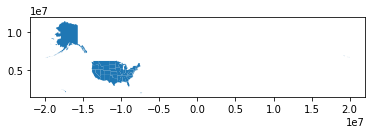

In [11]:
us_geo.plot()
# plt.xlim((-2, -0.5))
plt.show()

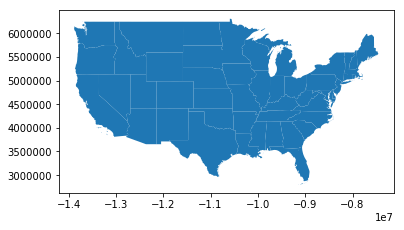

In [12]:
us_geo = us_geo[(us_geo.NAME != "Hawaii") & (us_geo.NAME != "Alaska") & (us_geo.NAME != "Puerto Rico")]
us_geo.plot()
plt.show()

In [13]:
cafes = geopandas.GeoDataFrame(cafes)
cafes.crs = {'init' :'epsg:4326'}
cafes = cafes.to_crs({'init': 'epsg:3395'})

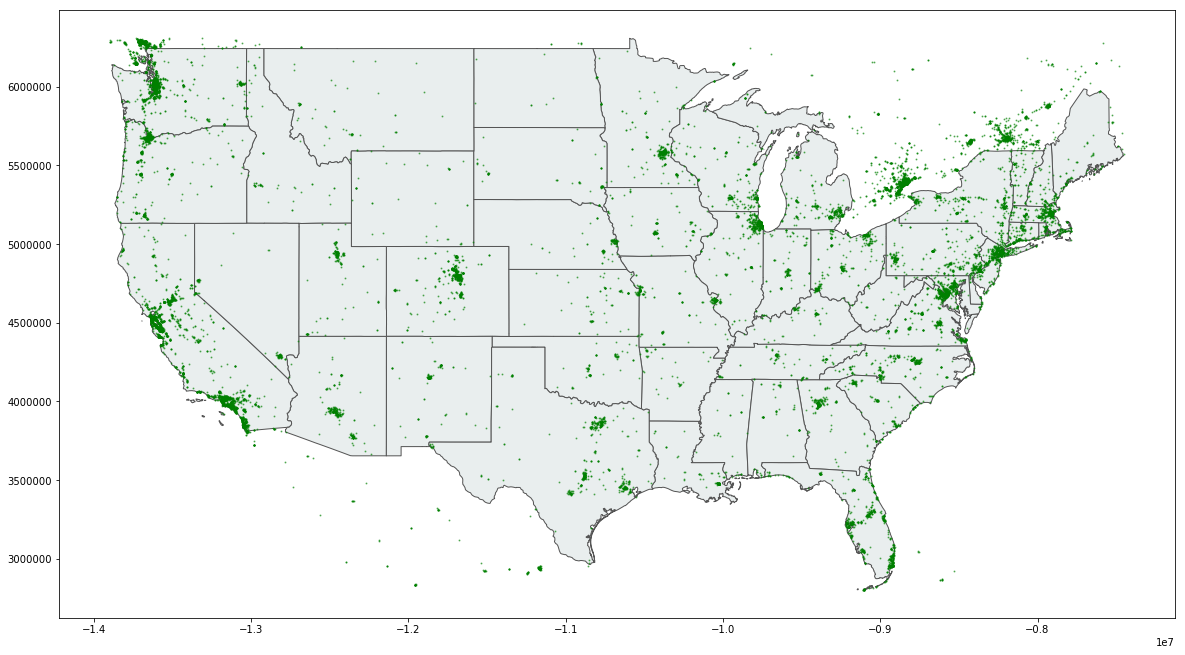

In [24]:
base = us_geo.plot(color='#e9eeee', edgecolor='#555555', figsize=(20,20))
cafes.plot(ax=base, marker='o', color='green', markersize=1, alpha=0.5)
plt.show()

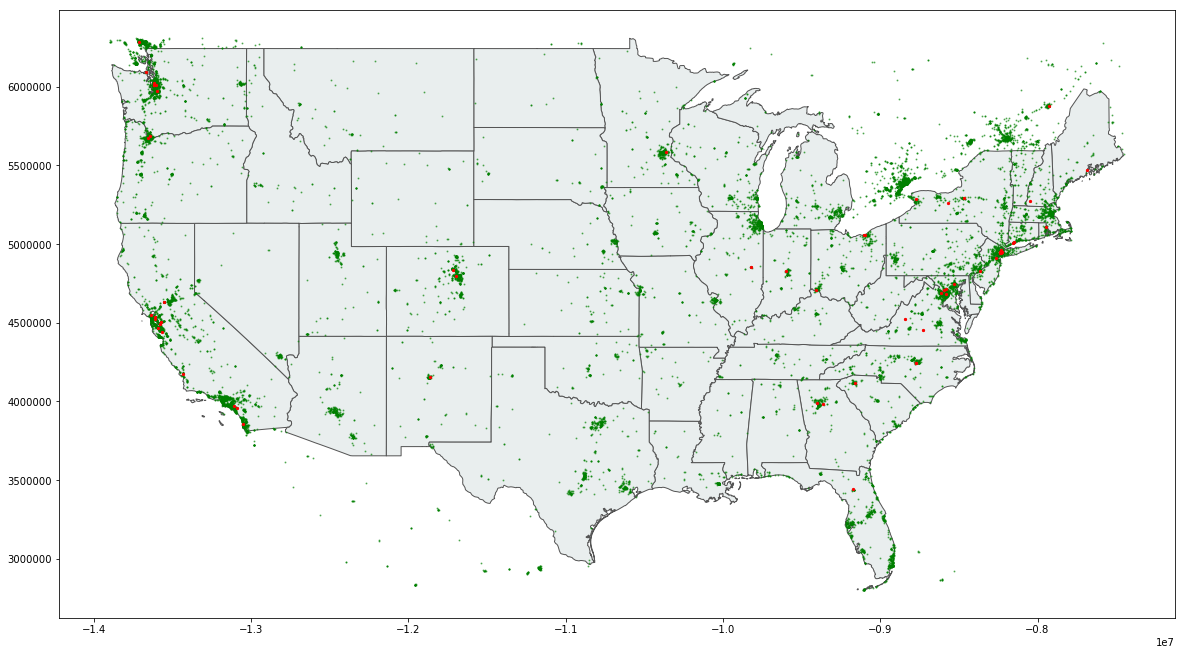

In [27]:
base = us_geo.plot(color='#e9eeee', edgecolor='#555555', figsize=(20,20))
cafes[cafes['cuisine']!='bagel'].plot(ax=base, marker='o', color='green', markersize=1, alpha=0.5)
cafes[cafes['cuisine']=='bagel'].plot(ax=base, marker='o', color='red', markersize=5, alpha=1)
plt.show()

### References

Geopandas mapping: http://geopandas.org/mapping.html